In [1]:
#Remove warning
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing Libraries
import pandas as pd
import numpy as np
import random as rnd


# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Preprocessing 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score,KFold,cross_val_predict

#Scoring
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.feature_selection import SelectKBest, f_classif,mutual_info_classif
from xgboost import XGBClassifier
from xgboost import plot_importance
from matplotlib import pyplot

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

#Displaying all columns
pd.set_option('display.max_columns', None)

# Importing Dataset

In [3]:
train_df = pd.read_csv('./train.csv')
test_df = pd.read_csv('./test.csv')

In [4]:
print('--Train data--')
train_df.head()

--Train data--


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
print('--Test Data--')
test_df.head()

--Test Data--


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# Correlation

In [6]:
#finding Correlation with target variable 'Survived'
correlation = train_df.corr().unstack().sort_values(kind = 'quicksort',ascending = False).reset_index()
correlation = correlation[correlation['level_0'] != correlation['level_1']]
print("--Correlation--")
correlation[correlation['level_0'] == 'Survived']

--Correlation--


,level_0,level_1,0
10,Survived,Fare,0.257307
20,Survived,Parch,0.081629
30,Survived,PassengerId,-0.005007
33,Survived,SibSp,-0.035322
37,Survived,Age,-0.077221
43,Survived,Pclass,-0.338481


In [7]:
#Check shape of Train and Test dataset
print("Shape of Train dataset",train_df.shape)
print('Shape of Test dataset',test_df.shape)

Shape of Train dataset (891, 12)
Shape of Test dataset (418, 11)


# finding Missing value

In [8]:
#Checking which columns has missing value
print('***Train data***')
print(train_df.isnull().sum())
print('-'*20)
print('***Test data***')
print(test_df.isnull().sum())

***Train data***
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
--------------------
***Test data***
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [9]:
#function to visualise missing value
def missingdata(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percentage = (data.isnull().sum()/data.shape[0] * 100).sort_values(ascending = False)
    
    missing_data = pd.concat([total,percentage],axis = 1 , keys = ['total','percentage'])
    missing_data = missing_data[missing_data['percentage'] > 0]
    
    #Plot graph
    f,ax =plt.subplots(figsize=(8,6))
    plt.xticks(rotation='90')
    fig=sns.barplot(missing_data.index, missing_data["percentage"],color="green",alpha=0.8)
    plt.xlabel('Features', fontsize=15)
    plt.ylabel('Percent of missing values', fontsize=15)
    plt.title('Percent missing data by feature', fontsize=15)
    
    return missing_data


--Missing Data in Train Dataset--


,total,percentage
Cabin,687,77.104377
Age,177,19.865320
Embarked,2,0.224467


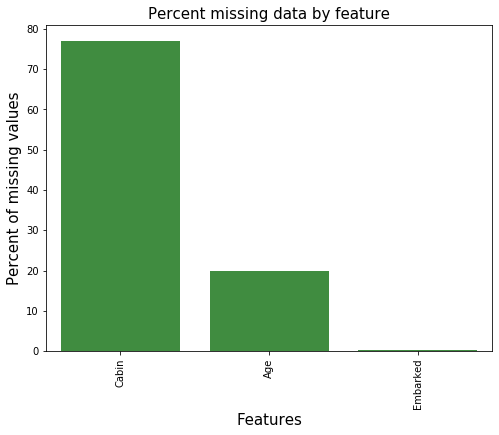

In [10]:
print("--Missing Data in Train Dataset--")
missingdata(train_df)

--Missing Data in Test Dataset--


,total,percentage
Cabin,327,78.229665
Age,86,20.574163
Fare,1,0.239234


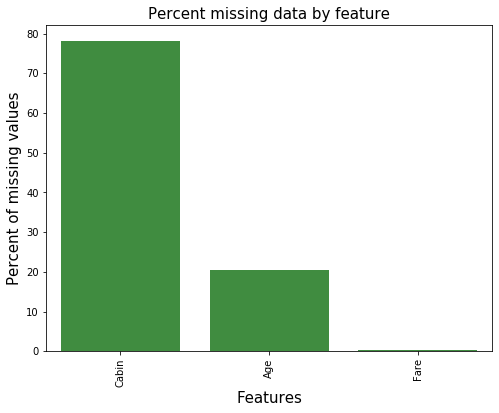

In [11]:
print("--Missing Data in Test Dataset--")
missingdata(test_df)

In [12]:
#Droping 'Cabin' column since it contains over 70% of missing values

train_df.drop(['Cabin'], axis=1,inplace = True)
test_df.drop('Cabin',axis=1,inplace = True)

#Shape after Droping 'Cabin'
print("Shape of Train after droping a column:", train_df.shape)
print("Shape of Train after droping a column:", test_df.shape)

Shape of Train after droping a column: (891, 11)
Shape of Train after droping a column: (418, 10)


# Data Analysis and Visualisation

In [13]:
#Using Groupby function to see how columns are related with the Target column('Survived')

print('Pclass & Survived')
print(train_df[['Pclass','Survived']].groupby('Pclass', as_index = False).mean().sort_values('Survived', ascending = False))
print("\n")

print('Sex & Survived')
print(train_df[['Sex','Survived']].groupby('Sex',as_index = False).mean().sort_values('Survived', ascending = False))
print("\n")

print('SibSp & Survived')
print(train_df[['SibSp','Survived']].groupby('SibSp',as_index = False).mean().sort_values('Survived',ascending = False))
print("\n")

print('Parch & Survived')
print(train_df[['Parch','Survived']].groupby('Parch',as_index = False).mean().sort_values('Survived',ascending = False))

Pclass & Survived
   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363


Sex & Survived
      Sex  Survived
0  female  0.742038
1    male  0.188908


SibSp & Survived
   SibSp  Survived
1      1  0.535885
2      2  0.464286
0      0  0.345395
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000


Parch & Survived
   Parch  Survived
3      3  0.600000
1      1  0.550847
2      2  0.500000
0      0  0.343658
5      5  0.200000
4      4  0.000000
6      6  0.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11c743470>,
      dtype=object)

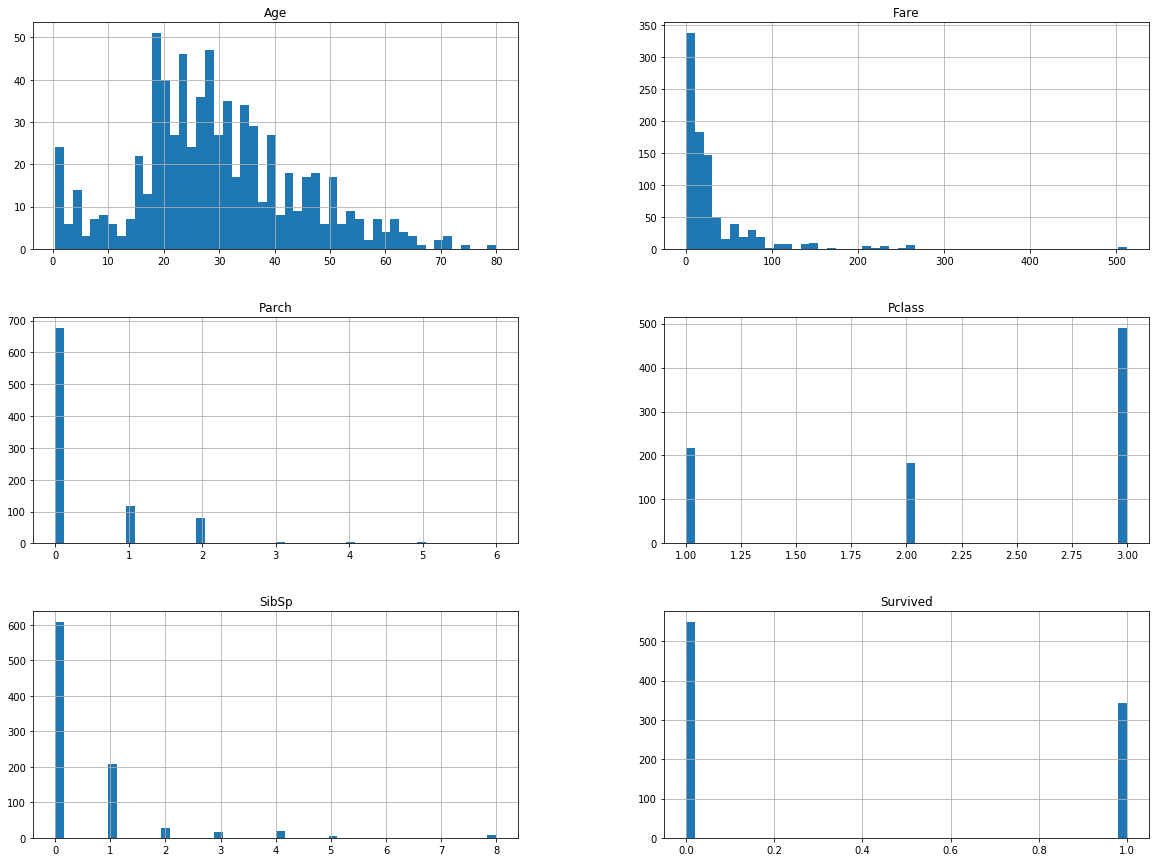

In [14]:
#Visualising data using histogram
train_df.drop('PassengerId',1).hist(bins = 50 , figsize = (20,15))

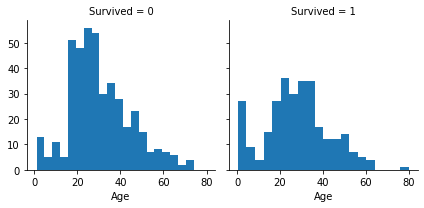

In [15]:
#Visualising Age and Survived
grid = sns.FacetGrid(train_df,col = 'Survived')
grid.map(plt.hist,'Age',bins = 20)

/Users/dsnanaware/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


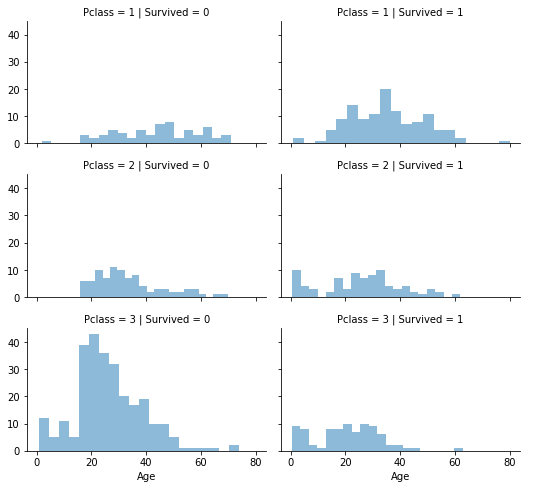

In [16]:
#Visualizing Age, Pclass, Survived
grid = sns.FacetGrid(train_df,col = 'Survived',row = 'Pclass',size = 2.3, aspect = 1.6)
grid.map(plt.hist, 'Age',alpha = 0.5, bins = 20)
grid.add_legend()

/Users/dsnanaware/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Users/dsnanaware/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/Users/dsnanaware/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:720: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


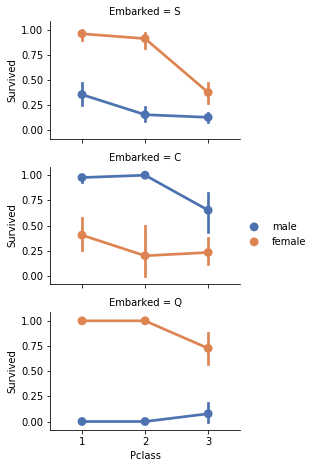

In [17]:
#Visualizing Embarked,Pclass,Survived,Sex
grid = sns.FacetGrid(train_df, row = 'Embarked', size = 2.2 , aspect = 1.6)
grid.map(sns.pointplot,'Pclass','Survived','Sex',palette = 'deep')
grid.add_legend()

/Users/dsnanaware/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Users/dsnanaware/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


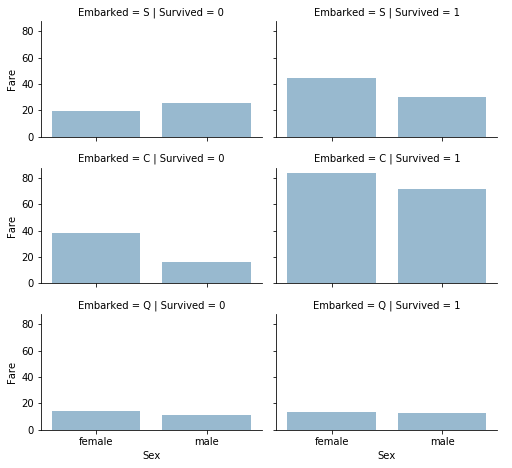

In [18]:
#Visualizing Embarked,Sex,Fare
grid = sns.FacetGrid(train_df, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci= None)
grid.add_legend()

# feature Engineering

In [19]:
#Defining Function for Feature engineering

def feature_engineering(data, flag = 'train_df'):
    processed_df = data
    
    #Removing columns that are not required
    processed_df = processed_df.drop(['PassengerId'], axis=1)
    
    #Handling missing values
    processed_df['Embarked'].fillna('S',inplace = True)
    #processed_df['Age'].fillna(processed_df['Age'].mean(),inplace = True)
    #processed_df['Age'] = processed_df['Age'].astype(int)
    #processed_df['Fare'].interpolate()
    
    processed_df['Sex'] = processed_df['Sex'].map({'male': 0, 'female': 1}).astype(int)
    processed_df['Embarked'] = processed_df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})
    
    if flag == 'test_df':
        processed_df['Fare'].fillna(processed_df['Fare'].mean(), inplace = True)
        
    #for 'Age' column
    
    guess_age = np.zeros((2,3))
    
    for i in range(0,2):
        for j in range(0,3):
            guess_df = processed_df[(processed_df['Sex'] == i) & (processed_df['Pclass'] == j +1)]['Age'].dropna()
            
            age_mean = guess_df.mean()
            age_std = guess_df.std()
            
            age_guess = rnd.uniform(age_mean - age_std, age_mean + age_std)
            
            age_guess = guess_df.median()
            
            #Convert random age float to nearest 0.5 age
            guess_age[i,j] = int(age_guess/0.5 + 0.5)* 0.5
    
    for i in range(0,2):
        for j in range(0,3):
            processed_df.loc[(processed_df.Age.isnull()) & (processed_df.Sex == i) & (processed_df.Pclass == j+1),'Age'] = guess_age[i,j]
    
    processed_df['Age'] = processed_df['Age'].astype(int)
    
    
    processed_df['Family_size'] = processed_df['SibSp'] + processed_df['Parch'] + 1
    
    processed_df['IsAlone'] = 0
    processed_df.loc[processed_df['Family_size'] == 1,'IsAlone'] = 1
    
    
    #for 'Title' column
    processed_df['Title'] = pd.Series((name.split('.')[0].split(',')[1].strip() for name in train_df['Name']), index=train_df.index)
    processed_df['Title'] = processed_df['Title'].replace(['Lady', 'the Countess','Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    processed_df['Title'] = processed_df['Title'].replace(['Mlle', 'Ms'], 'Miss')
    processed_df['Title'] = processed_df['Title'].replace('Mme', 'Mrs')
    processed_df['Title'] = processed_df['Title'].map({"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5})
        
        
    #Creating bin for age feature
    processed_df['Age_bin'] = pd.cut(processed_df['Age'], bins=[0,12,20,40,120], labels=['Children','Teenage','Adult','Elder'])
    
    #Creating bin for fare features
    processed_df['Fare_bin'] = pd.cut(processed_df['Fare'], bins=[0,7.91,14.45,31,120], labels=['Low_fare','median_fare','Average_fare','high_fare'])
    
    #Creating dummy values
    processed_df = pd.get_dummies(processed_df,columns = ["Age_bin","Fare_bin","Title"], prefix=["Age_type","Fare_type","Title"])
    
    
    processed_df = processed_df.drop(['Age','Name','Ticket','SibSp','Parch'],axis = 1)
    
    
    return processed_df

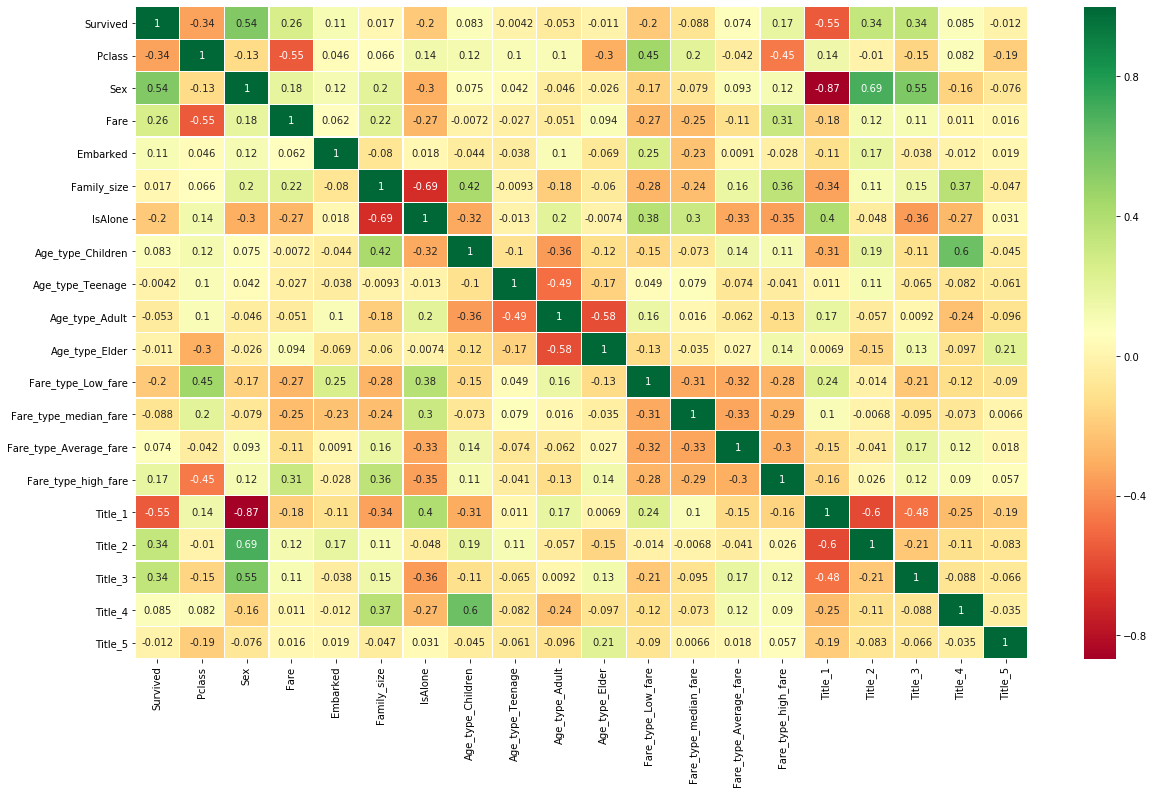

In [20]:
#Creating Heatmap

sns.heatmap(feature_engineering(train_df).corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(20,12)
plt.show()

# Splitting the data

In [21]:
#Select the target variable
train_df_copy = train_df.copy()
X = train_df_copy.drop(['Survived'],axis = 1)
y = train_df_copy['Survived']

X = feature_engineering(X)

In [22]:
#Normalizing 

sc = StandardScaler()
X = pd.DataFrame(sc.fit_transform(X.values), index=X.index, columns=X.columns)

#Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25,random_state = 42)  
print("shape of train after feature engineering: ", X.shape)

shape of train after feature engineering:  (891, 19)


# Applying Machine Learning

In [23]:
#Logistic Regression

lr = LogisticRegression()
lr.fit(X_train,y_train)

#Prediction
lr_prediction = lr.predict(X_test)

#Accuracy Score
lr_score = accuracy_score(y_test,lr_prediction)
print("Prediction scoring using Logistic Regression", lr_score)

kfold = KFold(n_splits=10, random_state=42)

lr_cv_score = cross_val_score(lr,X,y,cv=10,scoring='accuracy').mean()

print('The cross validated score for Logistic Regression is:',round(lr_cv_score*100,2))

y_pred_lr = cross_val_predict(lr,X,y,cv=10)


Prediction scoring using Logistic Regression 0.8161434977578476
The cross validated score for Logistic Regression is: 82.5


In [24]:
#Random Forest
rf = RandomForestClassifier(criterion='gini', n_estimators=900,
                             min_samples_split=10,min_samples_leaf=1,
                             max_features='auto',oob_score=True,
                             random_state=42,n_jobs=-1)
rf.fit(X_train, y_train)

# Predict for test data sample
rf_prediction = rf.predict(X_test)

# Accuracy Score
rf_score = accuracy_score(y_test, rf_prediction)
print("Prediction score using Random Forest ", rf_score)

kfold = KFold(n_splits=10, random_state=42)

rf_cv_score = cross_val_score(rf,X,y,cv=10,scoring='accuracy').mean()

print('The cross validated score for RandomForestClassifier is:',round(rf_cv_score*100,2))



Prediction score using Random Forest  0.8565022421524664
The cross validated score for RandomForestClassifier is: 83.17


In [25]:
#Gradient Boosting Classifier
gb= GradientBoostingClassifier()

gb.fit(X_train,y_train)

prediction_gbc = gb.predict(X_test)

print('The accuracy of the Gradient Boosting Classifier is',round(accuracy_score(prediction_gbc,y_test)*100,2))

kfold = KFold(n_splits=10, random_state=42)

gb_cv_score = cross_val_score(gb,X,y,cv=10,scoring='accuracy').mean()

print('The cross validated score for Gradient Boosting Classifier is:',round(gb_cv_score*100,2))

The accuracy of the Gradient Boosting Classifier is 83.86
The cross validated score for Gradient Boosting Classifier is: 83.4


In [26]:
#Decision Tree
dt = DecisionTreeClassifier(min_samples_split=25, min_samples_leaf=30, random_state=42)
dt.fit(X_train, y_train)

# Predict for test data sample
dt_prediction = dt.predict(X_test)

#Accuracy score
dt_score = accuracy_score(y_test, dt_prediction)
print("Prediction score using Decision Tree", dt_score)

kfold = KFold(n_splits=10, random_state=42)

dt_cv_score = cross_val_score(dt,X,y,cv=10,scoring='accuracy').mean()

print('The cross validated score for DecisionTreeClassifier is:',round(dt_cv_score*100,2))

Prediction score using Decision Tree 0.8071748878923767
The cross validated score for DecisionTreeClassifier is: 80.93


In [27]:
#for Support Vector machine
svm = SVC(gamma='auto', random_state=42)
svm.fit(X_train, y_train)

# Predict for test data sample
svm_prediction = svm.predict(X_test)

#Accuracy score
svm_score = accuracy_score(y_test, svm_prediction)
print("Prediction score using SVM", svm_score)

kfold = KFold(n_splits=10, random_state=42)

svm_cv_score = cross_val_score(svm,X,y,cv=10,scoring='accuracy').mean()

print('The cross validated score for SVC is:',round(svm_cv_score*100,2))



Prediction score using SVM 0.8161434977578476
The cross validated score for SVC is: 82.27


In [28]:
#For Linear Discriminant Analysis

ld = LinearDiscriminantAnalysis()
ld.fit(X_train,y_train)

# Predict for test data sample
ld_prediction = ld.predict(X_test)

#Accuracy score
ld_score = accuracy_score(y_test, ld_prediction)
print("Prediction score using LD", ld_score)

kfold = KFold(n_splits=10, random_state=42)

ld_cv_score = cross_val_score(ld,X,y,cv=10,scoring='accuracy').mean()

print('The cross validated score for LinearDiscriminantAnalysis is:',round(ld_cv_score*100,2))


Prediction score using LD 0.8295964125560538
The cross validated score for LinearDiscriminantAnalysis is: 83.39


/Users/dsnanaware/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/dsnanaware/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/dsnanaware/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/dsnanaware/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/dsnanaware/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/dsnanaware/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are

# Model scores

In [29]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'Logistic Regression', 
              'Random Forest','Gradient Boosting', 'Linear Discriminant Analysis', 
              'Decision Tree'],
    'Score': [svm_cv_score,lr_cv_score,rf_cv_score,gb_cv_score,ld_cv_score,dt_cv_score]})
models.sort_values(by='Score',ascending=False)

,Model,Score
3,Gradient Boosting,0.833954
4,Linear Discriminant Analysis,0.833904
2,Random Forest,0.831681
1,Logistic Regression,0.824965
0,Support Vector Machines,0.822680
5,Decision Tree,0.809272


# Predicting on Test data

In [30]:
#Feature engineering on test set
test = feature_engineering(test_df, 'test_df')

test = pd.DataFrame(sc.transform(test.values), index=test.index, columns=test.columns)

In [31]:
#Using the best model for final prediction
final_prediction = gb.predict(test)